In [53]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

In [18]:
cube_hdul = fits.open('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/H40a_CubeMosaic_downsampled_x3_x1_5.fits')
cube = cube_hdul[0].data
cube_wcs = WCS(cube_hdul[0].header)
ACES_cat_path = '/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/cmz_sfr/aces_catalog_mv3_ms0.5_mp7_rms0.0001_min_peak0.0004_bl20_localrms2_globalrms3_tgif_fs1.0_2024_12_17_fullmask.fits'
ACES_cat = Table.read(ACES_cat_path)
ACES_coords = SkyCoord(l = ACES_cat['GLON']*u.deg, b = ACES_cat['GLAT']*u.deg, frame='galactic')

In [ ]:
# at each location: 
# determine the RMS in spectra
# see if there are any 2-3 sigma channels
# check the nearby channels too?

(400, 1360, 3707)

In [ ]:
ACES_coords[0]

<SkyCoord (Galactic): (l, b) in deg
    (0.8259237, -0.28058442)>

In [ ]:
ACES_coords_pix_x, ACES_coords_pix_y = ACES_coords.to_pixel(wcs_cube)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'tuple'

In [36]:
ACES_coords_pix_x = np.int32(ACES_coords_pix_x)
ACES_coords_pix_y = np.int32(ACES_coords_pix_y)

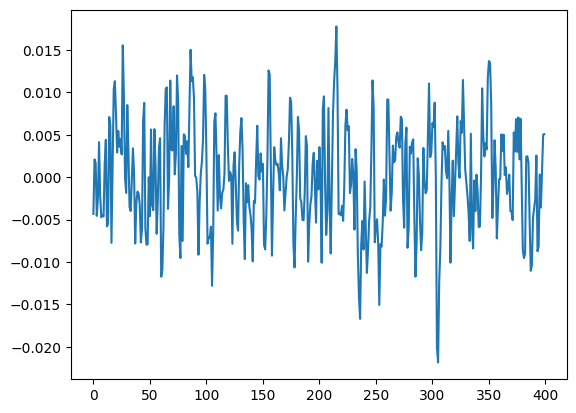

In [ ]:
delta = 5
i=60
cutout = cube[5, ACES_coords_pix_y[i]-delta:ACES_coords_pix_y[i]+delta, ACES_coords_pix_x[i]-delta: ACES_coords_pix_x[i]+delta]
spectra = cube[:, ACES_coords_pix_y[i], ACES_coords_pix_x[i]]
plt.plot(spectra)

In [96]:
for i in range(len(ACES_cat)):
    RRL_detected = []
    spectra = cube[:, ACES_coords_pix_y[i], ACES_coords_pix_x[i]]
    spectra_rms = np.std(spectra)
    spectra_max = max(spectra)
    RRL_detected += [(spectra_max/spectra_rms > 3)]

In [97]:
RRL_detected

[np.False_]